# Лабораторная работа 6

# Задача 1

## Генерация датасетов

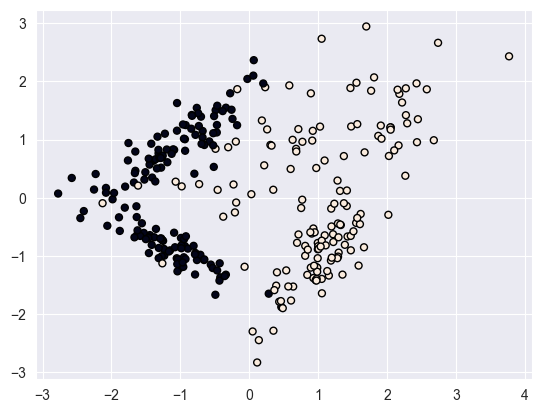

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


data_1, data_y_1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=130)

plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

In [2]:
data_1

array([[-0.02868686,  2.04388363],
       [ 2.27041985,  1.42135291],
       [-1.00147177, -1.2014376 ],
       [ 0.57937236,  1.93263194],
       [-0.46001793,  0.1371689 ],
       [-1.39042182,  0.63758649],
       [ 0.53452578, -1.24704031],
       [ 1.54846703, -0.43033484],
       [ 1.42390235, -0.66417735],
       [-0.92403547,  1.2504802 ],
       [-1.27972514,  0.51914345],
       [ 1.32606785, -0.46697709],
       [-1.65312152,  0.46476816],
       [-0.72853996,  0.23631116],
       [ 1.66229418, -0.84931764],
       [ 0.99205326, -0.77456715],
       [ 0.46298519, -1.87565333],
       [-1.89094852, -0.33448194],
       [ 0.30523929,  0.90961122],
       [-1.06901816,  0.27817863],
       [ 1.31482652,  0.11959335],
       [-1.1892571 ,  0.6121558 ],
       [-0.48923115,  1.50693568],
       [ 0.21525344,  0.55897625],
       [ 1.29471143, -0.94173345],
       [-0.22987674,  0.22994024],
       [-2.07972195,  0.1705762 ],
       [-2.77327828,  0.07403439],
       [ 0.92814203,

In [3]:
data_y_1

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

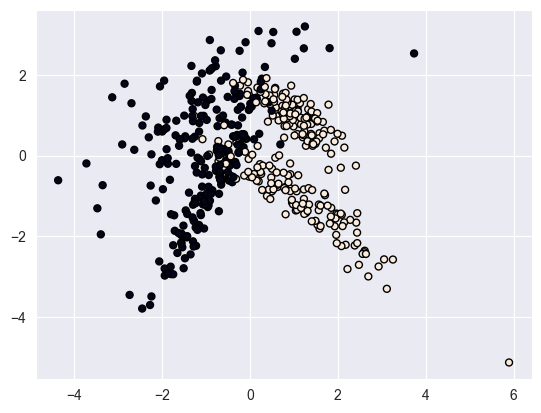

In [4]:
data_2, data_y_2 = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

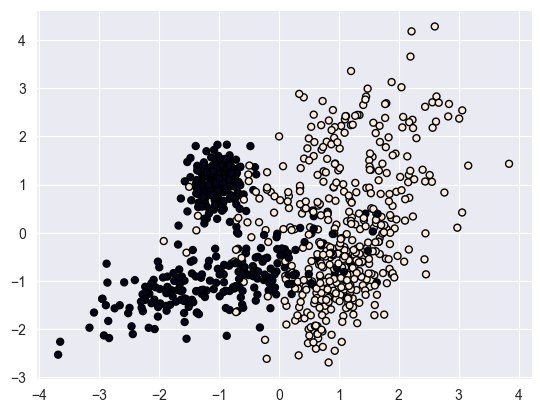

In [5]:
data_3, data_y_3 = make_classification(n_samples=900, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=200)

plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

In [6]:
data_3

array([[-0.58717342, -1.0223633 ],
       [ 0.32179001, -1.15806865],
       [-0.2722921 , -0.60066922],
       ...,
       [ 0.44937311,  0.50637135],
       [ 0.49874282, -0.85694015],
       [-2.06052394, -1.13159107]])

# Кластеризация

## K - means

In [7]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(2, n_init='auto').fit(data_1)
kmeans_2 = KMeans(2, n_init='auto').fit(data_2)
kmeans_3 = KMeans(2, n_init='auto').fit(data_3)

In [8]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score

def cluster_and_metrics_kmeans(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"rand score: {rand_score(claster.labels_, data_y)}")
    print(f"силуэт: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=100, c='red')

Датасет: 1
rand score: 0.8693645484949832
силуэт: 0.43964041616193583

индекс Калински-Харабаза: 239.35637949699787
индекс Дэвиса-Боулдина: 1.0068636877080164


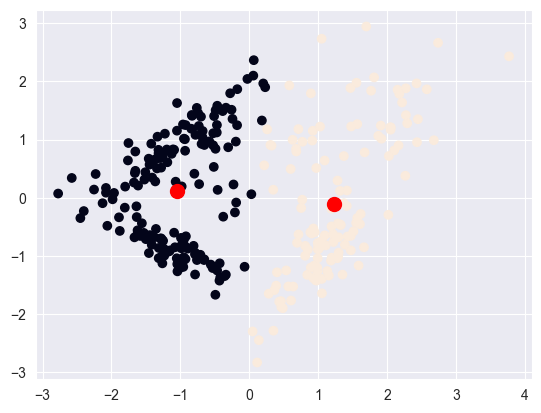

In [9]:
cluster_and_metrics_kmeans(data=data_1, data_y=data_y_1, claster=kmeans_1, num=1)

Датасет: 2
rand score: 0.49951102204408815
силуэт: 0.3472219171029111

индекс Калински-Харабаза: 262.59220539028684
индекс Дэвиса-Боулдина: 1.227399590329883


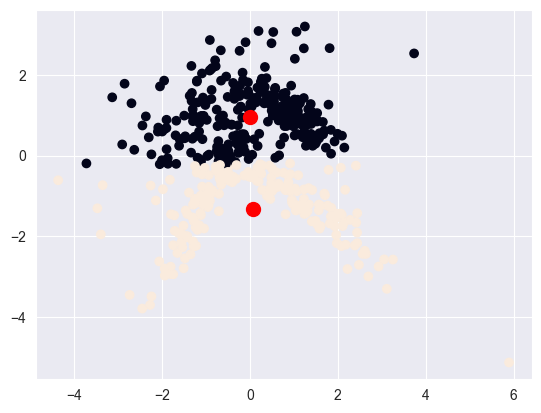

In [10]:
cluster_and_metrics_kmeans(data=data_2, data_y=data_y_2, claster=kmeans_2, num=2)

Датасет: 3
rand score: 0.8323791867507107
силуэт: 0.3959928636591262

индекс Калински-Харабаза: 574.9719379742565
индекс Дэвиса-Боулдина: 1.1137227236444398


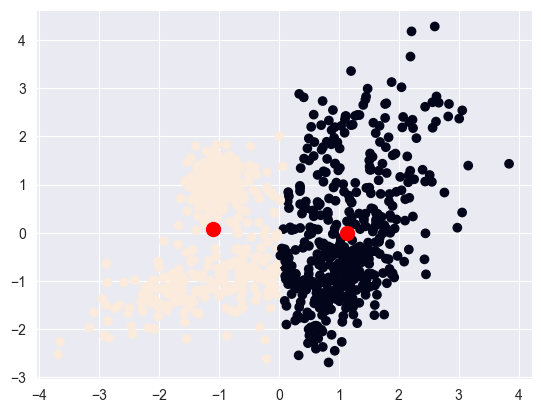

In [11]:
cluster_and_metrics_kmeans(data=data_3, data_y=data_y_3, claster=kmeans_3, num=3)

## Affinity propagation

In [12]:
from sklearn.cluster import AffinityPropagation

affinity_1 = AffinityPropagation(preference=-42).fit(data_1)
affinity_2 = AffinityPropagation(preference=-42).fit(data_2)
affinity_3 = AffinityPropagation(preference=-42).fit(data_3)

F:\Programming\GitHub_Reposit\Mashine-Learning\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
F:\Programming\GitHub_Reposit\Mashine-Learning\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [13]:
def cluster_and_metrics_affinity(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"rand score: {rand_score(claster.labels_, data_y)}")
    print(f"силуэт: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=50, c='black')
    

Датасет: 1
rand score: 0.627469342251951
силуэт: 0.4421873863893015

индекс Калински-Харабаза: 382.71065045545294
индекс Дэвиса-Боулдина: 0.773645678232183


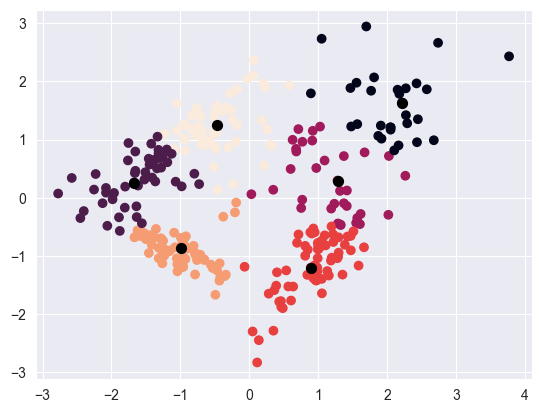

In [14]:
cluster_and_metrics_affinity(data=data_1, data_y=data_y_1, claster=affinity_1, num=1)

Датасет: 2
rand score: 0.5378917835671343
силуэт: 0.16854170767745094

индекс Калински-Харабаза: 78.05768933112572
индекс Дэвиса-Боулдина: 0.6922077912713283


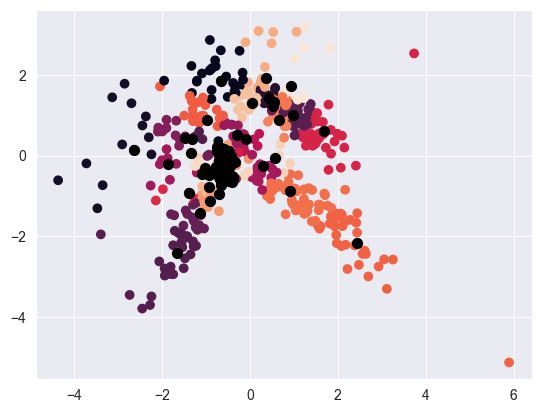

In [15]:
cluster_and_metrics_affinity(data=data_2, data_y=data_y_2, claster=affinity_2, num=2)

Датасет: 3
rand score: 0.5431417624521073
силуэт: 0.1748700233045506

индекс Калински-Харабаза: 80.54167931440324
индекс Дэвиса-Боулдина: 0.5570546412825617


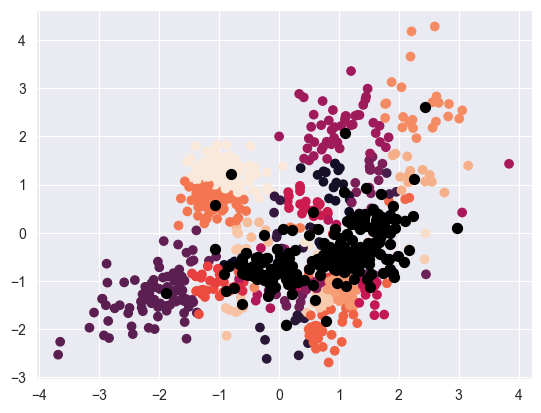

In [16]:
cluster_and_metrics_affinity(data=data_3, data_y=data_y_3, claster=affinity_3, num=3)

## DB-SCAN

In [17]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan_1 = DBSCAN().fit(data_1)
dbscan_2 = DBSCAN().fit(data_2)
dbscan_3 = DBSCAN().fit(data_3)

In [18]:
def cluster_and_metrics_dbscan(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"rand score: {rand_score(claster.labels_, data_y)}")
    print(f"силуэт: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    print(np.unique(claster.labels_))
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)

Датасет: 1
rand score: 0.4991304347826087
силуэт: 0.367765557373552

индекс Калински-Харабаза: 12.298862995252613
индекс Дэвиса-Боулдина: 1.4675015927198873
[-1  0]


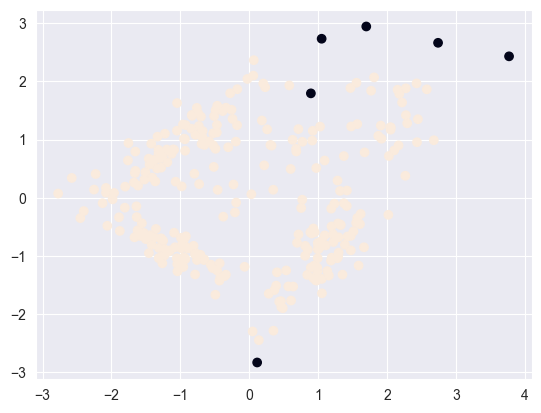

In [19]:
cluster_and_metrics_dbscan(data=data_1, data_y=data_y_1, claster=dbscan_1, num=1)

Датасет: 2
rand score: 0.5025330661322646
силуэт: 0.4050656049776778

индекс Калински-Харабаза: 4.439128278224971
индекс Дэвиса-Боулдина: 6.36475738203509
[-1  0]


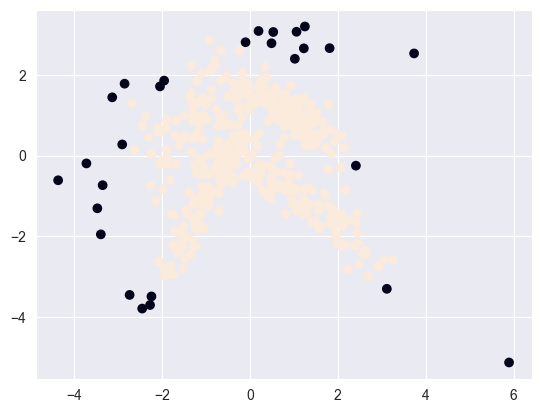

In [20]:
cluster_and_metrics_dbscan(data=data_2, data_y=data_y_2, claster=dbscan_2, num=2)

Датасет: 3
rand score: 0.49950562353231986
силуэт: 0.4364308430379813

индекс Калински-Харабаза: 4.582143802412806
индекс Дэвиса-Боулдина: 4.390903213416287
[-1  0]


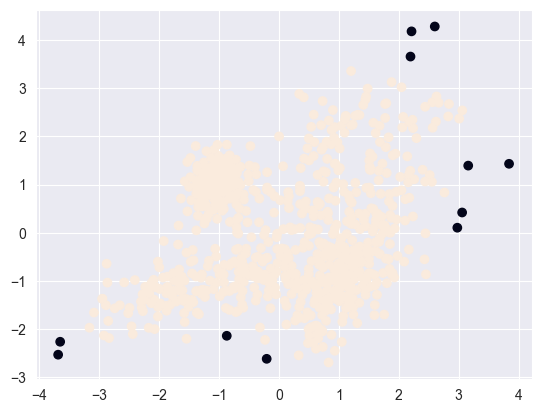

In [21]:
cluster_and_metrics_dbscan(data=data_3, data_y=data_y_3, claster=dbscan_3, num=3)

## Gaussian Mixtures, EM

In [22]:
from sklearn.mixture import GaussianMixture

gm_1 = GaussianMixture(n_components=3).fit(data_1)

gm_2 = GaussianMixture(n_components=3).fit(data_2)

gm_3 = GaussianMixture(n_components=3).fit(data_3)

In [23]:
def cluster_and_metrics_gm(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"rand score: {rand_score(claster.predict(data), data_y)}")
    print(f"силуэт: {silhouette_score(data, claster.predict(data))}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.predict(data))}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.predict(data))}")
    plt.scatter(data[:,0], data[:,1], c=claster.predict(data))
    plt.scatter(claster.means_[:,0], claster.means_[:,1], s=100, c='red')

Датасет: 1
rand score: 0.6140022296544035
силуэт: 0.3615767996332163

индекс Калински-Харабаза: 156.63896241159694
индекс Дэвиса-Боулдина: 0.8633808580255904


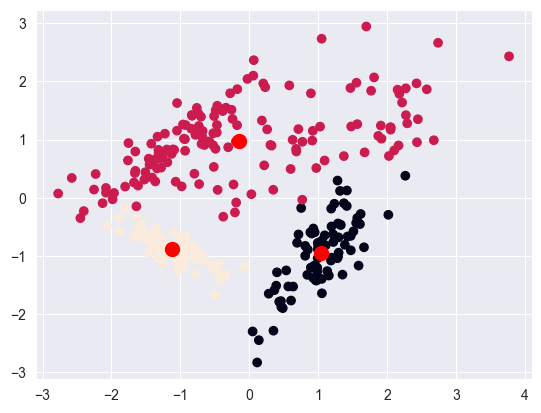

In [24]:
cluster_and_metrics_gm(data=data_1, data_y=data_y_1, claster=gm_1, num=1)

Датасет: 2
rand score: 0.7694909819639278
силуэт: 0.30115537289351

индекс Калински-Харабаза: 196.32379733601582
индекс Дэвиса-Боулдина: 1.0105310290060572


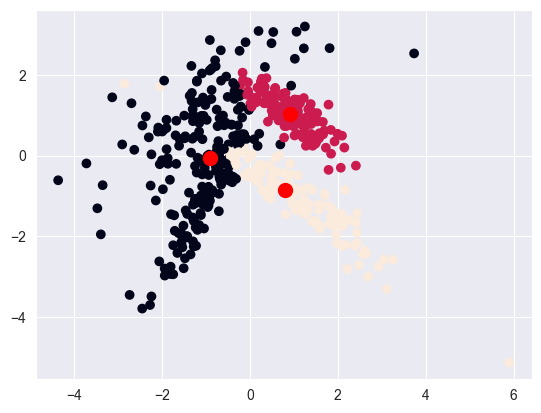

In [25]:
cluster_and_metrics_gm(data=data_2, data_y=data_y_2, claster=gm_2, num=2)

Датасет: 3
rand score: 0.6663576813743666
силуэт: 0.42773951814840644

индекс Калински-Харабаза: 659.9499326510634
индекс Дэвиса-Боулдина: 0.8610146220982998


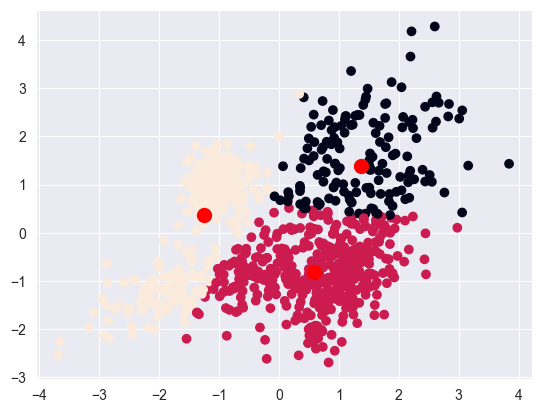

In [26]:
cluster_and_metrics_gm(data=data_3, data_y=data_y_3, claster=gm_3, num=3)

## Иерархическая кластеризация

In [27]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

clusters_1 = hierarchy.linkage(data_1, method="ward")
clusters_2 = hierarchy.linkage(data_2, method="ward")
clusters_3 = hierarchy.linkage(data_3, method="ward")

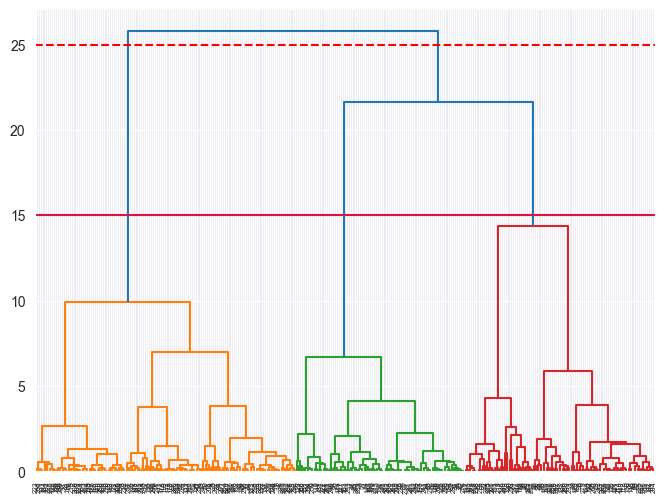

In [28]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_1)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

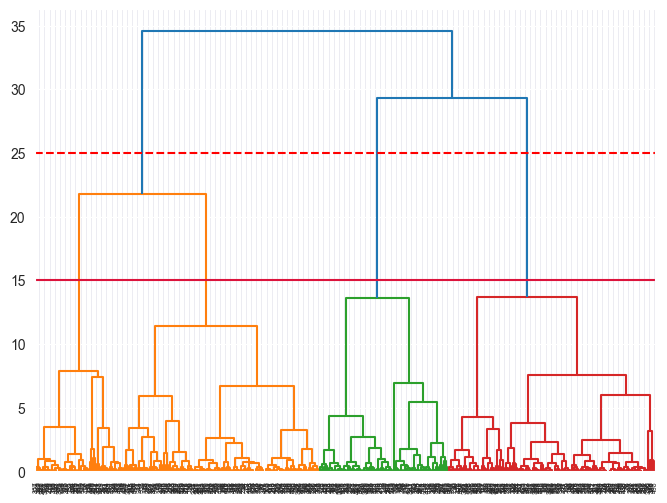

In [29]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_2)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

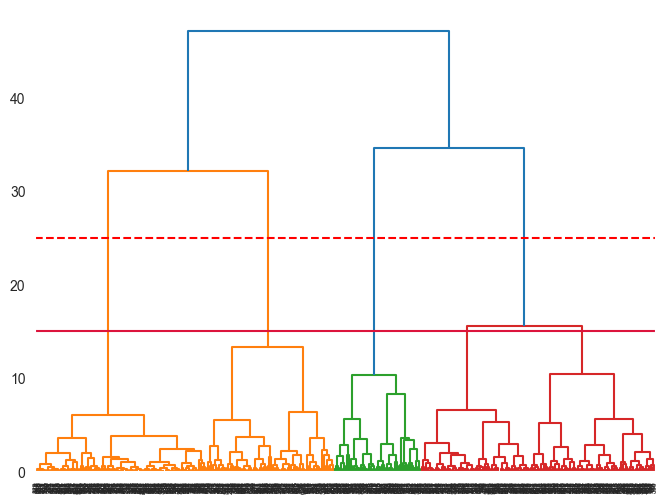

In [30]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_3)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

In [31]:
def cluster_and_metrics_cluster(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    clustering = AgglomerativeClustering(linkage="ward").fit(data)
    print(f"rand score: {rand_score(clustering.labels_, data_y)}")
    print(f"силуэт: {silhouette_score(data, clustering.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, clustering.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, clustering.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Датасет: 1
rand score: 0.7303010033444816
силуэт: 0.36426119672929647

индекс Калински-Харабаза: 184.3849927382834
индекс Дэвиса-Боулдина: 1.0883040381203561


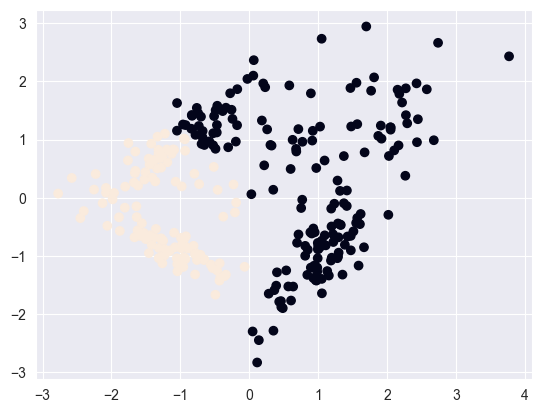

In [32]:
cluster_and_metrics_cluster(data=data_1, data_y=data_y_1, claster=clusters_1, num=1)

Датасет: 2
rand score: 0.7853386773547094
силуэт: 0.3257816852605416

индекс Калински-Харабаза: 239.7891961206974
индекс Дэвиса-Боулдина: 1.2281263155316728


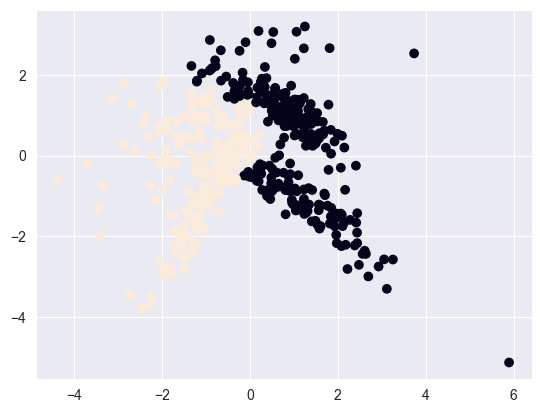

In [33]:
cluster_and_metrics_cluster(data=data_2, data_y=data_y_2, claster=clusters_2, num=2)

Датасет: 3
rand score: 0.8197997775305895
силуэт: 0.3886076411585022

индекс Калински-Харабаза: 562.0620504789613
индекс Дэвиса-Боулдина: 1.1251889910763966


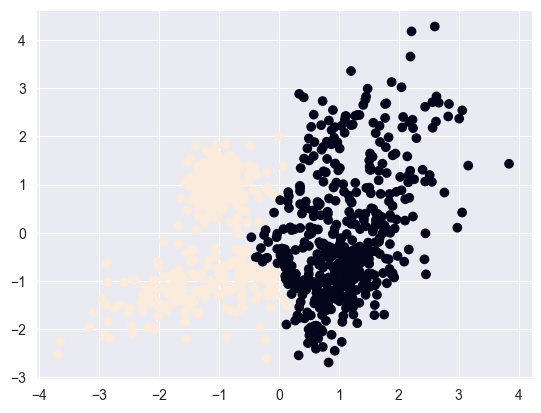

In [34]:
cluster_and_metrics_cluster(data=data_3, data_y=data_y_3, claster=clusters_3, num=3)

## Карты Кохонена

In [35]:
from sklearn_som.som import SOM

In [36]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_1)
predictions_1 = iris_som.predict(data_1)
predictions_1

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], d

In [37]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import davies_bouldin_score

print(rand_score(predictions_1, data_y_1))
print(jaccard_score(predictions_1, data_y_1, average="micro"))
print(silhouette_score(data_1, predictions_1))
print(davies_bouldin_score(data_1, predictions_1))

0.8693645484949832
0.03626943005181347
0.43964041616193583
1.0068636877080164


In [38]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_2)
predictions_2 = iris_som.predict(data_2)
predictions_2

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [39]:
print(rand_score(predictions_2, data_y_2))
print(jaccard_score(predictions_2, data_y_2, average="micro"))
print(silhouette_score(data_2, predictions_2))
print(davies_bouldin_score(data_2, predictions_2))

0.8325931863727455
0.8315018315018315
0.3393766192169436
1.2072668181514632


In [40]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_3)
predictions_3 = iris_som.predict(data_3)
predictions_3

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [41]:
print(rand_score(predictions_3, data_y_3))
print(jaccard_score(predictions_3, data_y_3, average="micro"))
print(silhouette_score(data_3, predictions_3))
print(davies_bouldin_score(data_3, predictions_3))

0.8005215671734025
0.0594467333725721
0.3946290616020969
1.115208358860856


# Задача 2

In [42]:
import pandas as pd

data_class = pd.read_csv(r"F:\Programming\GitHub_Reposit\Mashine-Learning\Работа 6\Data\card_transdata.csv")[:2000]

In [43]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [44]:
dtc = data_class
data_class = dtc.to_numpy()

# Kmeans 

In [45]:
kmeans_class = KMeans().fit(data_class)

силуэт: 0.5708856075895775

индекс Калински-Харабаза: 3602.7514453395643
индекс Дэвиса-Боулдина: 0.4921498439674707


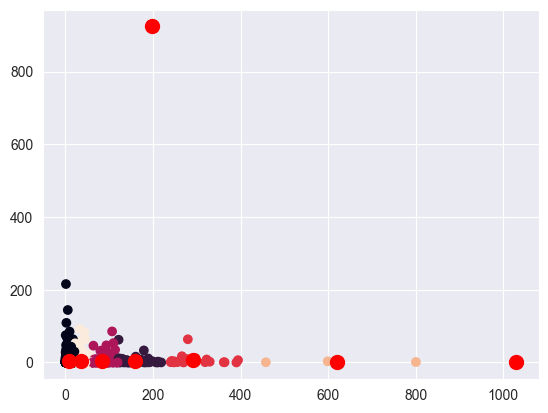

In [46]:
print(f"силуэт: {silhouette_score(data_class, kmeans_class.labels_)}\n")
print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data_class, kmeans_class.labels_)}")
print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data_class, kmeans_class.labels_)}")
plt.scatter(data_class[:,0], data_class[:,1], c=kmeans_class.labels_)
plt.scatter(kmeans_class.cluster_centers_[:,0], kmeans_class.cluster_centers_[:,1], s=100, c='red')

# Иерархическая кластеризация

In [47]:
cluster_class = hierarchy.linkage(data_class, method="ward")

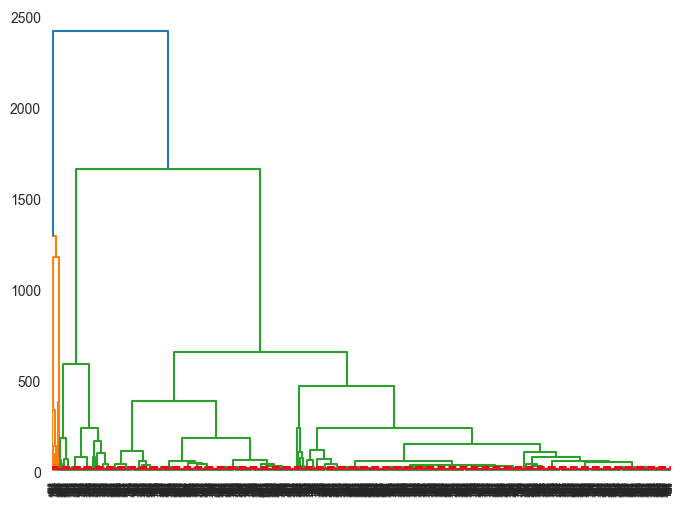

In [48]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(cluster_class)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

силуэт: 0.8999556139379867

индекс Калински-Харабаза: 1495.687571004934
индекс Дэвиса-Боулдина: 0.5331441405770643


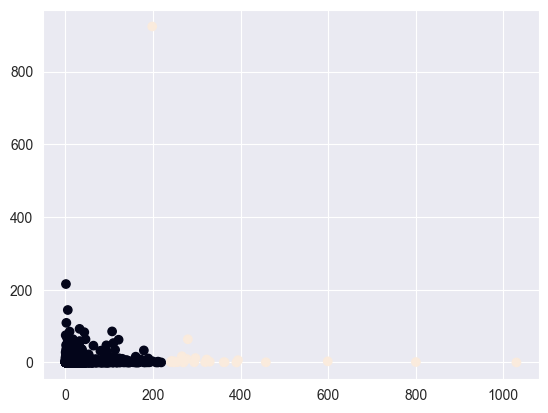

In [49]:
clustering = AgglomerativeClustering(linkage="ward").fit(data_class)
print(f"силуэт: {silhouette_score(data_class, clustering.labels_)}\n")
print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data_class, clustering.labels_)}")
print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data_class, clustering.labels_)}")
plt.scatter(data_class[:,0], data_class[:,1], c=clustering.labels_)

# DBScan

In [50]:
dbscan_class = DBSCAN().fit(data_class)

силуэт: -0.5930484022788105

индекс Калински-Харабаза: 1.72181222924603
индекс Дэвиса-Боулдина: 1.4389799505531462
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


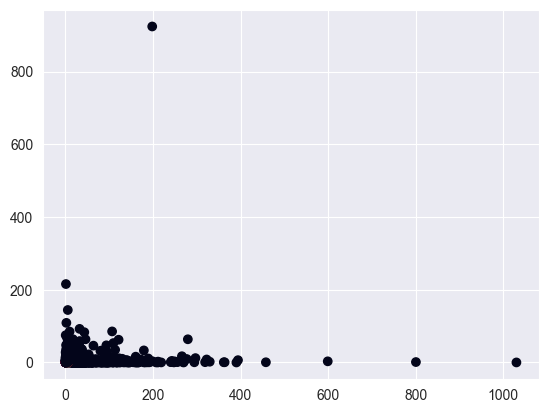

In [51]:
print(f"силуэт: {silhouette_score(data_class, dbscan_class.labels_)}\n")
print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data_class, dbscan_class.labels_)}")
print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data_class, dbscan_class.labels_)}")
print(np.unique(dbscan_class.labels_))
plt.scatter(data_class[:,0], data_class[:,1], c=dbscan_class.labels_)

Итого: Худший результат показал DBScan, лучший результат показала иерархическая кластеризация: силуэт около 0.9